# Check my SCM run

* The below notebook allows to compare a single column model simulation against a set of benchmark simulations (shown in gray).
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [1]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'LMDZ/staged/LMDZ_FixN.'

## select LES and SCM run(s) of interest
sim_keyword_col_les = 'WRF_Lx25_dx100_FixN.'
sim_keyword_col_scm = 'ModelE'  

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=1026157027&format=xlsx',
                              sheet_name='SCM')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, layer'])

var_vec_2d = var_vec_2d[var_vec_2d!='zf']

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, layer'])

In [6]:
df_gray_1d

,class,time,ps,ts,ustar,z0,z0h,z0q,hfss,hfls,...,od,odlc,pr,pri,rlut,rlds,rlus,ssaf,lwp,colflag
0.166667,LMDZ/staged/LMDZ_FixN.nc,-6600.0,99544.5,247.0,0.711296,0.0009,0.000006,0.000006,10.669720,4.734838,...,5.040632,NaN,0.000002,0.000002,-150.526825,-155.560913,211.05278,NaN,0.0,gray
0.333333,LMDZ/staged/LMDZ_FixN.nc,-6000.0,99544.5,247.0,0.703199,0.0009,0.000006,0.000006,4.138755,4.879663,...,5.040632,NaN,0.000002,0.000002,-150.526825,-155.560913,211.05278,NaN,0.0,gray
0.500000,LMDZ/staged/LMDZ_FixN.nc,-5400.0,99544.5,247.0,0.651165,0.0009,0.000006,0.000006,2.706631,4.124664,...,5.040632,NaN,0.000001,0.000001,-150.526825,-155.560913,211.05278,NaN,0.0,gray
0.666667,LMDZ/staged/LMDZ_FixN.nc,-4800.0,99544.5,247.0,0.685433,0.0009,0.000006,0.000006,2.837417,4.565694,...,5.040632,NaN,0.000001,0.000001,-150.526825,-155.560913,211.05278,NaN,0.0,gray
0.833333,LMDZ/staged/LMDZ_FixN.nc,-4200.0,99544.5,247.0,0.691785,0.0009,0.000006,0.000006,2.357959,4.670315,...,5.040632,NaN,0.000001,0.000001,-150.526825,-155.560913,211.05278,NaN,0.0,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000000,LMDZ/staged/LMDZ_FixN.nc,-7200.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.0,gray
0.000000,LMDZ/staged/LMDZ_FixN.nc,-7200.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.0,gray
0.000000,LMDZ/staged/LMDZ_FixN.nc,-7200.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.0,gray
0.000000,LMDZ/staged/LMDZ_FixN.nc,-7200.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.0,gray


In [3]:
## load all simulations located in subfolders of the given directory
df_gray_1d,df_gray_2d = load_sims('../../output_scm/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1)

## example using LES
df_col_1d_les,df_col_2d_les = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_les)

## example using SCM
df_col_1d_scm,df_col_2d_scm = load_sims('../../output_scm/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_scm)


Loading variables: f(time)
../../output_scm/LMDZ/staged/LMDZ_FixN.nc
ol not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
zi not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
cflc not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
cfc not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
odlc not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
ssaf not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
Loading variables: f(time,height)
../../output_scm/LMDZ/staged/LMDZ_FixN.nc
pe not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
fc not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
uw not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
vw not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
w2 not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
wth not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
vf_thli not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
wqv not found in ../../output_scm/LMDZ/staged/LMDZ_FixN.nc
vf_qt not found in ../../outp

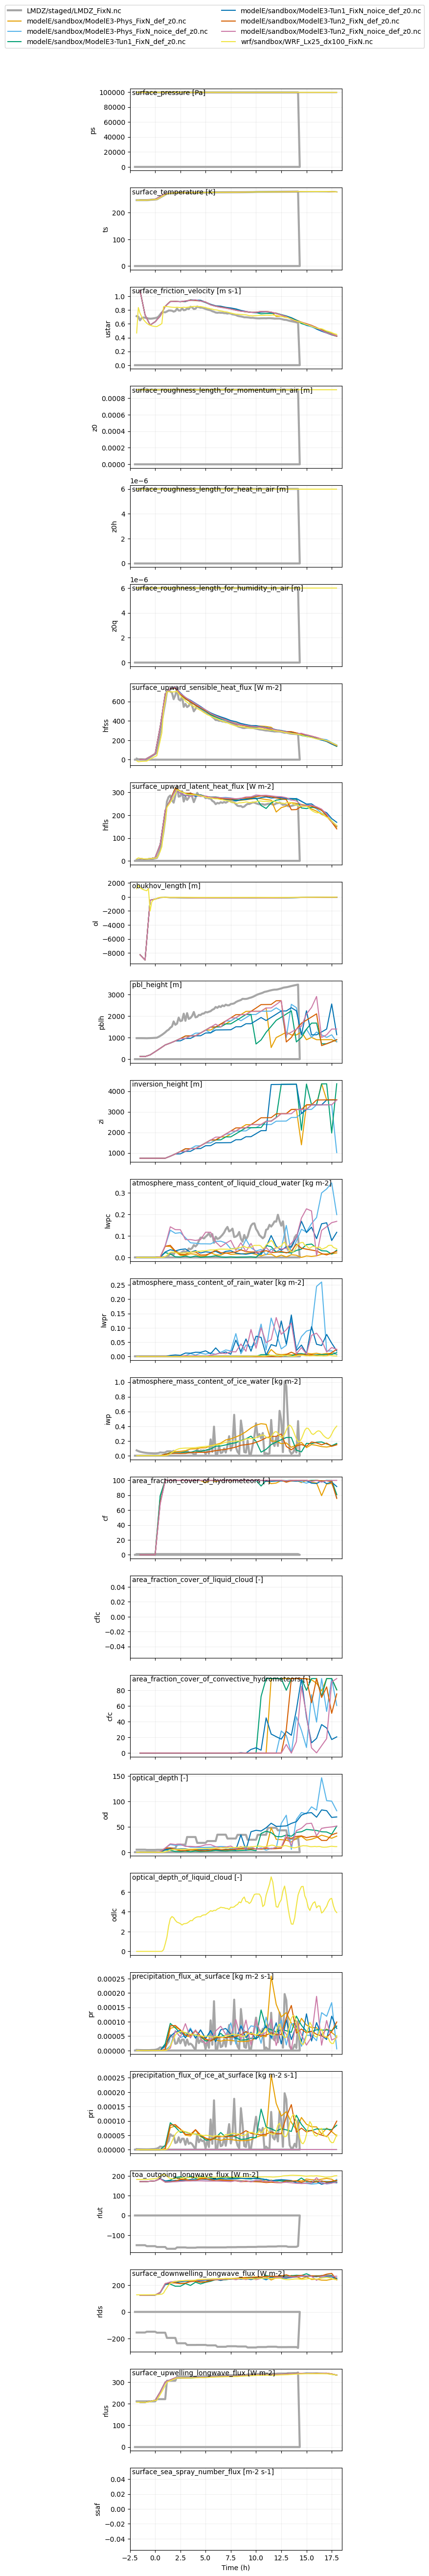

In [4]:
# plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d_scm,df_col_1d_les]),var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units)

temporal averaging over 1.0 h interval


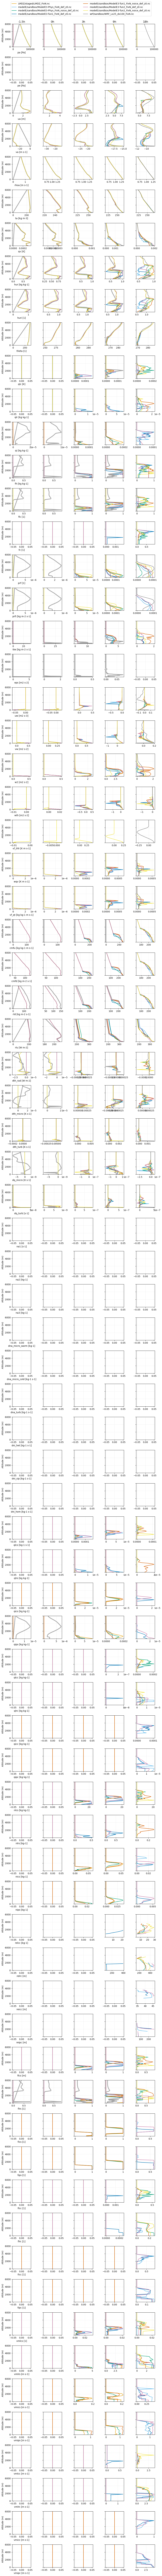

<Figure size 1000x600 with 0 Axes>

In [5]:
%run functions_plotting.py

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d_scm,df_col_2d_les]),var_vec = var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units)## example where ERA5 and radiosonde are included
